<a href="https://colab.research.google.com/github/AnswerinCode/tensorflow_study/blob/main/tf_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.tensorflow.org/tutorials/keras/text_classification

텐서플로 튜토리얼을 참고했습니다.

In [2]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as tfl
import numpy as np
print(tf.__version__)

2.6.0


#**imdb dataset**
imdb는 각 단어가 해당하는 정수로 바뀐(a == 0, zulu = 9999 등등) 리뷰 문장과, 긍정/부정의 결과를 포함하는 라벨이 한쌍으로 이루어진 데이터셋입니다.

단어가 정수로 바뀐 이유는 학습 효율성을 높이기 위해서입니다.
imdb.load_data(num_words=k) 에서 num_words는 리뷰를 상위 k번째 단어까지만 포함하고 그 아래는 oov_char로 표현합니다.

예를 들어 잘 쓰이지 않는 durian같은 경우 그대로 표현되지 않고 oov_char로 표현합니다.

이는 학습 효율을 높이기 위함입니다.(특이한 단어에 과적합 방지)

In [3]:
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 1s 0us/step


data를 확인합니다.


In [13]:
print("train data shape: {}, train_labels_shape: {}".format(train_data.shape, train_labels.shape))
print("train data 0\n")
for word in range(0,len(train_data[0]),10):
    print(train_data[0][word:word+10])

train data shape: (25000,), train_labels_shape: (25000,)
train data 0

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]
[458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25]
[100, 43, 838, 112, 50, 670, 2, 9, 35, 480]
[284, 5, 150, 4, 172, 112, 167, 2, 336, 385]
[39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447]
[4, 192, 50, 16, 6, 147, 2025, 19, 14, 22]
[4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16]
[43, 530, 38, 76, 15, 13, 1247, 4, 22, 17]
[515, 17, 12, 16, 626, 18, 2, 5, 62, 386]
[12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16]
[480, 66, 3785, 33, 4, 130, 12, 16, 38, 619]
[5, 25, 124, 51, 36, 135, 48, 25, 1415, 33]
[6, 22, 12, 215, 28, 77, 52, 5, 14, 407]
[16, 82, 2, 8, 4, 107, 117, 5952, 15, 256]
[4, 2, 7, 3766, 5, 723, 36, 71, 43, 530]
[476, 26, 400, 317, 46, 7, 4, 2, 1029, 13]
[104, 88, 4, 381, 15, 297, 98, 32, 2071, 56]
[26, 141, 6, 194, 7486, 18, 4, 226, 22, 21]
[134, 476, 26, 480, 5, 144, 30, 5535, 18, 51]
[36, 28, 224, 92, 25, 104, 4, 226, 65, 16]
[38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113]
[103,

In [6]:
for dt in range(5):
    print(len(train_data[dt]), end=' ')
print()
print(max([len(i) for i in train_data]))

218 189 141 550 147 
2494


확인 결과 리뷰마다 길이가 다릅니다. 그리고 string이 아닌 int값으로 되어있습니다.
따라서,

1. input shape를 일정하게 만들어주는 데이터 전처리가 필요합니다.
2. 리뷰를 글자로 볼 수 있어야 합니다.

리뷰의 숫자를 단어로 다시 바꿀 수 있는 함수를 만들겠습니다.



In [8]:
word_index = imdb.get_word_index()

1654784/1641221 [==============================] - 0s 0us/step


key = word, value = index 인 dictionary입니다. n번째로 많이 포함되는 단어의 index는 n 입니다. 

따라서 index는 1부터 시작합니다.

맨 앞에 직접 설정으로 4개 단어를 추가하고 싶기 때문에 dictionary의 index를 전체적으로 뒤로 4칸 밀겠습니다.


In [9]:
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

key = index, value = word 인 reversed_dictionary입니다.

In [14]:
reversed_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [15]:
def decode_review(text):
    return ' '.join([reversed_word_index.get(i, '?') for i in text])
    # get() i가 있다면 i의 value를, 없다면 '?'를 리턴

 이걸로 리뷰를 글자로 볼 수 있게 되었습니다.


In [16]:
print(decode_review(train_data[0]))

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

data를 padding합니다.

최대 길이를 256으로 정하고 256보다 짧은 문장의 경우 뒤('post')에 padding하겠습니다.

In [17]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [18]:
# 위에서 단어를 상위 10000개만 불러왔기 때문에 사전 크기는 10000개입니다.
vocab_size = 10000
model = keras.Sequential([
    # word embedding으로 여러 단어들을 16개의 특징으로 묶는다.
    # 그리고 단어가 해당 특징을 얼마나 가지는지를 실수값으로 표현.
    tfl.Embedding(vocab_size, 16, input_shape=(None,)),
    # return (batch, sequence, embedding)

    # global average pooling 1d는 두번째 차원에 대한 평균을 구해 반환합니다.
    tfl.GlobalAveragePooling1D(),
    # (batch, sequence, embedding) -> (batch, 1, embedding) -> (batch, embedding)

    tfl.Dense(16, activation='relu'),
    # 2진분류(1/0)를 할 예정이므로 sigmoid를 써줍시다.
    tfl.Dense(1, activation='sigmoid')
])

In [25]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [21]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [22]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 2s 22ms/step - loss: 0.6918 - accuracy: 0.6108 - val_loss: 0.6899 - val_accuracy: 0.6926
Epoch 2/40
30/30 [==============================] - 0s 16ms/step - loss: 0.6864 - accuracy: 0.7135 - val_loss: 0.6826 - val_accuracy: 0.7045
Epoch 3/40
30/30 [==============================] - 0s 16ms/step - loss: 0.6759 - accuracy: 0.7429 - val_loss: 0.6698 - val_accuracy: 0.7558
Epoch 4/40
30/30 [==============================] - 1s 17ms/step - loss: 0.6579 - accuracy: 0.7759 - val_loss: 0.6490 - val_accuracy: 0.7541
Epoch 5/40
30/30 [==============================] - 1s 17ms/step - loss: 0.6311 - accuracy: 0.7859 - val_loss: 0.6208 - val_accuracy: 0.7822
Epoch 6/40
30/30 [==============================] - 1s 17ms/step - loss: 0.5955 - accuracy: 0.8074 - val_loss: 0.5840 - val_accuracy: 0.7975
Epoch 7/40
30/30 [==============================] - 0s 17ms/step - loss: 0.5527 - accuracy: 0.8213 - val_loss: 0.5434 - val_accuracy: 0.8110
Epoch 8/40
30

In [23]:
results = model.evaluate(test_data,  test_labels, verbose=2)


782/782 - 1s - loss: 0.3211 - accuracy: 0.8731


In [26]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

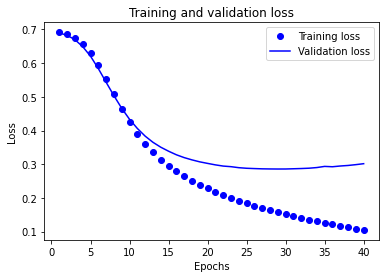

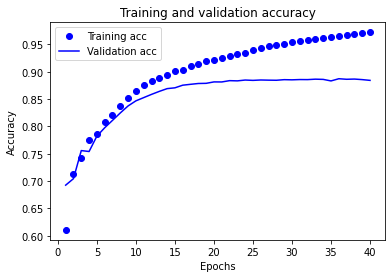

In [27]:
# 그래프로 확인해봅시다.
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()